<h1 style="font-size:3rem;color:maroon;"> Predicting Air Pollution Level using Machine Learning</h1>

This notebook is created for the modelling of the full data using [Scikit-learn](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

![title](images/scikit_learn_map.png)

<h2><font color=slateblue> Preparing the tools </font></h2>

In [1]:
# Regular EDA
import pandas as pd
import numpy as np
import seaborn as sns

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDClassifier, ElasticNet, BayesianRidge, LassoLars
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Save a model
import pickle

<h2><font color=slateblue>Read CSV file </font></h2>

In [2]:
# read prepared dataset csv file
df = pd.read_csv("data/df_prepared_full_data.csv")
df.sample(5)

,PC4,people_number,pm2.5,wd,ws,ssrd,blh,year,month,day,day_of_week,day_of_year
7862,5623,14511.0,2.683368,115.721717,4.175382,164.923105,688.180045,2021,8,27,4,239
9161,5656,19591.0,3.843690,261.047920,5.521067,58.877919,787.028289,2021,10,5,1,278
1245,5656,3993.0,10.917554,31.614175,6.768951,22.297383,599.836634,2021,2,7,6,38
10554,5615,6995.0,52.221626,157.837383,1.519763,18.393932,302.659997,2021,11,16,1,320
6028,5626,19631.0,8.642432,189.948572,2.106227,147.273065,426.568758,2021,7,2,4,183


<h2><font color=slateblue>Modelling </font></h2>

<h4><font color=mediumvioletred>Get X and y</font></h4>

In [3]:
X = df.drop("pm2.5", axis=1)
y = df["pm2.5"]

<h4><font color=mediumvioletred>Get a sample of X </font></h4>

In [4]:
X.sample(5)

,PC4,people_number,wd,ws,ssrd,blh,year,month,day,day_of_week,day_of_year
5750,5626,13614.0,110.635599,2.486275,168.785019,528.509221,2021,6,24,3,175
6283,5625,11667.0,167.556976,1.121096,156.968634,295.056543,2021,7,10,5,191
4264,5641,4657.0,245.660297,4.689120,171.880820,1002.626179,2021,5,10,0,130
2689,5644,8933.0,211.635289,2.723964,112.607086,411.384877,2021,3,23,1,82
6962,5643,7108.0,241.545945,4.648446,176.088407,804.006466,2021,7,30,4,211


<h4><font color=mediumvioletred>Get a sample of y </font></h4>

In [5]:
y.sample(5)

441     12.909690
1156    19.401867
8156    13.664092
1979    32.396336
3980    12.960111
Name: pm2.5, dtype: float64

<h4><font color=mediumvioletred>Split data into training and testing </font></h4>

In [6]:
df_train = df[((df.month == 8) & (df.day <= 15)) | (df.month < 8)]
df_test = df[(df.month == 8) & (df.day > 15)]

len(df_train), len(df_test)

(7491, 528)

<h4><font color=mediumvioletred>Split data into X & y </font></h4>

In [7]:
X_train, y_train = df_train.drop("pm2.5", axis=1), df_train["pm2.5"]
X_test, y_test = df_test.drop("pm2.5", axis=1), df_test["pm2.5"]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7491, 11), (7491,), (528, 11), (528,))

In [8]:
X_train.head()

,PC4,people_number,wd,ws,ssrd,blh,year,month,day,day_of_week,day_of_year
0,5611,6671.0,203.334312,2.886824,35.783607,241.558209,2021,1,1,4,1
1,5656,9330.0,202.914324,2.885721,36.077402,243.613262,2021,1,1,4,1
2,5658,1539.0,203.860565,2.900199,35.915225,240.125790,2021,1,1,4,1
3,5612,5478.0,203.603766,2.890154,35.685987,240.507430,2021,1,1,4,1
4,5625,3793.0,204.119216,2.896506,35.493932,238.454701,2021,1,1,4,1


<h4><font color=mediumvioletred>Create a method to evaluate model with Mean Absolute Error (MAE)</font></h4>

MAE is the average of the absolute differences between predictions and actual values.
It gives an idea of how wrong the model's predictions are.

In [9]:
def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Testing MAE": mean_absolute_error(y_test, test_preds)
    }
    
    return scores

<h4><font color=mediumvioletred>Create a method to get a dataframe containing actual values, predictions and the differences between the two</font></h4>

In [10]:
def get_scores_dataframe(model):
    test_preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, test_preds)

    df = pd.DataFrame(data={"actual values": y_test,
                           "predicted values": test_preds})

    df["differences"] = np.abs(df["predicted values"] - df["actual values"])

    return df

<h4><font color=mediumvioletred>Model with RandomForestRegressor </font></h4>

In [11]:
rf_model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

# fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [12]:
# score model
show_scores(rf_model)

{'Training MAE': 0.04148096618323276, 'Testing MAE': 2.204505979700974}

In [13]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(rf_model)
df_scores.sort_values(by="differences").head(10)

,actual values,predicted values,differences
7787,3.272192,3.272361,0.000169
7760,3.272192,3.272361,0.000169
7759,3.272192,3.272866,0.000674
7783,3.272192,3.274034,0.001842
7769,3.272192,3.274801,0.002609
7766,3.272192,3.274801,0.002609
7764,3.272192,3.274854,0.002662
7777,3.195306,3.237576,0.042270
7782,3.203754,3.248858,0.045104
7784,3.203754,3.251493,0.047739


<h4><font color=mediumvioletred>Model with SGDClassifier </font></h4>

In [14]:
sgd_model = SGDClassifier(n_jobs=-1,
                        random_state=42)

# fit the model
sgd_model.fit(X_train, y_train.astype(int))

SGDClassifier(n_jobs=-1, random_state=42)

In [15]:
# score model
show_scores(sgd_model)

{'Training MAE': 6.002589016170117, 'Testing MAE': 2.0665269534696233}

In [16]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(sgd_model)
df_scores.sort_values(by="differences").head(10)

,actual values,predicted values,differences
7552,7.984402,8,0.015598
7547,7.984402,8,0.015598
7795,4.019568,4,0.019568
7906,4.019999,4,0.019999
7911,4.019999,4,0.019999
7789,3.960641,4,0.039359
7537,7.951692,8,0.048308
7540,7.951692,8,0.048308
7538,7.951692,8,0.048308
7730,8.052810,8,0.052810


<h4><font color=mediumvioletred>Model with BayesianRidge </font></h4>

In [17]:
br_model = BayesianRidge()

# fit the model
br_model.fit(X_train, y_train)

BayesianRidge()

In [18]:
# score model
show_scores(br_model)

{'Training MAE': 4.4578978244784055, 'Testing MAE': 4.6377377180052655}

In [19]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(br_model)
df_scores.sort_values(by="differences").head(10)

,actual values,predicted values,differences
7656,6.580035,6.570071,0.009964
7687,6.757639,6.741476,0.016164
7670,6.775566,6.800379,0.024813
7675,6.580035,6.555095,0.024941
7667,6.580035,6.551839,0.028196
7664,6.757639,6.795211,0.037572
7674,6.757639,6.710497,0.047143
7660,6.757639,6.700077,0.057562
7682,6.580035,6.640109,0.060074
7681,6.580035,6.644488,0.064453


<h4><font color=mediumvioletred>Model with Lasso </font></h4>

In [20]:
lasso_model = LassoLars(alpha=.1, 
                  normalize=False,
                  random_state=42)

# fit the model
lasso_model.fit(X_train, y_train)

LassoLars(alpha=0.1, normalize=False, random_state=42)

In [21]:
# score model
show_scores(lasso_model)

{'Training MAE': 4.619486298105045, 'Testing MAE': 3.4365124189695675}

In [22]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(lasso_model)
df_scores.sort_values(by="differences").head(10)

,actual values,predicted values,differences
7652,6.357635,6.127766,0.229869
7636,6.406548,6.138659,0.267889
7637,6.329469,6.036660,0.292808
7628,6.406548,6.099841,0.306707
7626,6.485935,6.153935,0.331999
7624,6.440382,6.086861,0.353521
7650,6.440382,6.081795,0.358587
7648,6.357635,5.970011,0.387624
7623,6.440382,6.049700,0.390682
7631,6.440382,6.046309,0.394073


<h4><font color=mediumvioletred>Model with ElasticNet </font></h4>

In [23]:
en_model = ElasticNet(random_state=42)

# fit the model
en_model.fit(X_train, y_train)

ElasticNet(random_state=42)

In [24]:
# score model
show_scores(en_model)

{'Training MAE': 4.618523434662631, 'Testing MAE': 3.3682789129454496}

In [25]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(en_model)
df_scores.sort_values(by="differences").head(10)

,actual values,predicted values,differences
7652,6.357635,6.256553,0.101082
7637,6.329469,6.211098,0.118370
7636,6.406548,6.271537,0.135011
7628,6.406548,6.250314,0.156234
7648,6.357635,6.197059,0.160576
7629,6.357635,6.184467,0.173168
7650,6.440382,6.226776,0.213605
7626,6.485935,6.271435,0.214500
7624,6.440382,6.221882,0.218500
7623,6.440382,6.204750,0.235632


<h4><font color=mediumvioletred>Model with SVR </font></h4>

In [26]:
svr_model = SVR()

# fit the model
svr_model.fit(X_train, y_train)

SVR()

In [27]:
# score model
show_scores(svr_model)

{'Training MAE': 5.295803803386109, 'Testing MAE': 3.0729252334507695}

In [28]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(svr_model)
df_scores.sort_values(by="differences").head(10)

,actual values,predicted values,differences
7555,7.813364,7.826770,0.013406
7750,7.594278,7.577156,0.017122
7744,7.676454,7.695858,0.019405
7527,7.705212,7.726794,0.021582
7653,6.602896,6.558139,0.044757
7738,7.500286,7.454228,0.046057
7595,8.782942,8.831538,0.048597
7600,8.485416,8.564541,0.079124
7721,8.458179,8.368847,0.089332
7753,7.633494,7.541329,0.092165


<h4><font color=mediumvioletred>Model with GradientBoostingRegressor </font></h4>

In [29]:
gbr_model = GradientBoostingRegressor(n_estimators=100, 
                                  learning_rate=0.1, 
                                  max_depth=1,
                                  random_state=42)

# fit the model
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, random_state=42)

In [30]:
# score model
show_scores(gbr_model)

{'Training MAE': 3.72130970813905, 'Testing MAE': 2.025178202818663}

In [31]:
# create dataframe containing actual values, predictions and the differences between them
df_scores = get_scores_dataframe(gbr_model)
df_scores.sort_values(by="differences").head(10)

,actual values,predicted values,differences
7494,3.673863,3.654161,0.019703
7522,3.673863,3.654161,0.019703
7495,3.607192,3.654161,0.046969
7501,3.607192,3.654161,0.046969
7504,3.607192,3.654161,0.046969
7503,3.607192,3.654161,0.046969
7506,3.717458,3.654161,0.063297
7519,3.717458,3.654161,0.063297
7517,3.717458,3.654161,0.063297
7523,3.717458,3.654161,0.063297


<h4><font color=mediumvioletred>Conclusion </font></h4>

After calculating the MAE (average of the absolute differences between predictions and actual values), we found that the following models had the best predictions:
* GradientBoostingRegressor: 2.025178202818663
* SGDClassifier: 2.0665269534696233
* RandomForestRegressor: 2.204505979700974

**After using more data (from 2021-01-01 to 2021-11-18), the models' scores improved tremendously.**

<h4><font color=mediumvioletred>Check feature importance</font></h4>

Feature importance means which feature affected the model the most.

In [32]:
gbr_model.feature_importances_

array([0.        , 0.        , 0.0407698 , 0.00958661, 0.05720872,
       0.58399274, 0.        , 0.00165094, 0.02286216, 0.00912815,
       0.27480088])

In [33]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

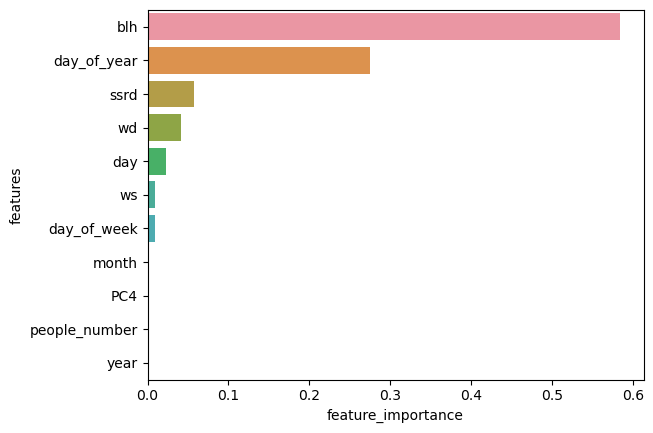

In [34]:
plot_features(X_train.columns, gbr_model.feature_importances_)

<h4><font color=mediumvioletred>Export the best model (GradientBoostingRegressor)</font></h4>

In [35]:
pickle.dump(gbr_model, open("models/gbr_air_quality_prediction_model.pkl", "wb")) # wb = write binary

<h4><font color=mediumvioletred>Load the exported model and test it</font></h4>

In [36]:
loaded_model = pickle.load(open("models/gbr_air_quality_prediction_model.pkl", "rb"))
show_scores(loaded_model)

{'Training MAE': 3.72130970813905, 'Testing MAE': 2.025178202818663}